In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import tweepy as tw
from tweepy import OAuthHandler
import time
import re
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
import string
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [14]:
data = pd.read_csv('bfml.csv')
data

,Unnamed: 0,tweet_text,label
0,0,RT @RutgersRivals: Curious about @RutgersRival...,postive
1,1,@BeezyMcGee Although we do have many orders sh...,negative
2,2,Black Friday 2021 https://t.co/f7d0OArfwm,NaN
3,3,"RT @LeftistMoniker: Well, it worked. Black Fri...",negative
4,4,To handle peak sales of more than $3.1 million...,positive
...,...,...,...
1495,1495,So I just realized that like the first 15 peop...,Positive
1496,1496,RT @ASovietOnion: thinking of Him as black fri...,Positive
1497,1497,RT @RowlandRIVALS: NEW: Cats Illustrated has l...,Neutral
1498,1498,RT @AirgoneFr: Congratulations and thank you t...,Positive


In [15]:
def cleanTxt(text):

    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r':', '', text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/\S+', '',text)
    return text

In [16]:
data['tweet_text'] = data['tweet_text'].apply(cleanTxt)

data

,Unnamed: 0,tweet_text,label
0,0,Curious about premium?! \n \n Take advantage ...,postive
1,1,Although we do have many orders shipping out ...,negative
2,2,Black Friday 2021 https//t.co/f7d0OArfwm,NaN
3,3,"Well, it worked. Black Friday sales were so ab...",negative
4,4,To handle peak sales of more than $3.1 million...,positive
...,...,...,...
1495,1495,So I just realized that like the first 15 peop...,Positive
1496,1496,thinking of Him as black friday draws near🥴 ht...,Positive
1497,1497,NEW Cats Illustrated has learned of a newly sc...,Neutral
1498,1498,Congratulations and thank you to\n who just b...,Positive


In [17]:
data.isnull().sum()

Unnamed: 0      0
tweet_text      0
label         152
dtype: int64

In [18]:
data.label.value_counts()

positive    731
negative    428
Positive     85
Postive      33
Negative     31
neutral      20
postive      11
positve       4
poitive       2
Neutral       2
poistive      1
Name: label, dtype: int64

In [19]:
data.label = data.label.replace({'Positive': 'positive',
                                'Postive': 'positive',
                                'postive': 'positive',
                                'positve': 'positive',
                                'poitive': 'positive',
                                'poistive': 'positive',
                                
                                'Negative': 'negative',
                                 
                                'Neutral': 'neutral'})

In [20]:
data.label.value_counts()

positive    867
negative    459
neutral      22
Name: label, dtype: int64

In [21]:
data = data[(data['label'] == 'positive') | (data['label'] == 'negative') | (data['label'] == 'neutral')]
data = data[['tweet_text', 'label']]
# data

In [22]:
data['tweet_text'] = data['tweet_text'].astype(str)
data['label'] = data['label'].astype(str)

In [23]:
data['data_col'] = data[['tweet_text', 'label']].apply(tuple, axis=1)

In [24]:
# data

In [25]:
traindf = data[:1100]
# traindf

In [26]:
testdf = data[1100:]
# testdf

In [27]:
train = traindf['data_col']
train = train.values.tolist()
testdf = testdf['data_col']
testdf = testdf.values.tolist()

In [28]:
from textblob import classifiers
cl = classifiers.NaiveBayesClassifier(train)
dt_cl = classifiers.DecisionTreeClassifier(train)

In [29]:
# cl.classify('RT @AirgoneFr: Congratulations and thank you to@CreatendCollect who just bought /" Overflow /" 🤩(black friday sale) Now owner of 7 pieces f…')

In [30]:
cl.accuracy(testdf)

0.8669354838709677

In [31]:
dt_cl.accuracy(testdf)

0.8669354838709677

### Get recent tweets

In [32]:
api_key = ['Yjc72iLaViJKBgUkgQTlbxinB']
api_secret_key = ['e94PdXwuFOuwU8Vh0nveP0MiWlu2NenKH8sdGMiLIoIkn1v2IJ']
access_token = ['898536142852718592-JrOTEmiLUWaJTzKVw1kVZbk27YqBtnK']
access_token_secret =['uWV4eQf0rDqzA8idPs1nXRo1l1NiAnegUZcaPcCjAZoDZ']

In [33]:
auth = tw.OAuthHandler('Yjc72iLaViJKBgUkgQTlbxinB','e94PdXwuFOuwU8Vh0nveP0MiWlu2NenKH8sdGMiLIoIkn1v2IJ')
auth.set_access_token('898536142852718592-JrOTEmiLUWaJTzKVw1kVZbk27YqBtnK','uWV4eQf0rDqzA8idPs1nXRo1l1NiAnegUZcaPcCjAZoDZ')
api = tw.API(auth, wait_on_rate_limit=True)

In [34]:
tweets = []
def tweets_query(api,query,count,max_requests):
    tweets = tw.Cursor(api.search_tweets, q=query,lang="en",since_id='2021-30-11').items(count)
    #tweets
    tweets_list  = [[tweet.text, tweet.id, tweet.source, tweet.coordinates, tweet.retweet_count, tweet.favorite_count,
                tweet.user._json['name'],tweet.user._json['screen_name'], tweet.user._json['location'], tweet.user._json['friends_count'],
                tweet.user._json['verified'], tweet.user._json['description'], tweet.user._json['followers_count']] for tweet in tweets]
    tweets_df= pd.DataFrame(tweets_list, columns = ['tweet_text','tweet_id', 'tweet_source','coordinates','retweet_count','likes_count','Username', 'screen_name','location', 'friends_count','verification_status','description','followers_count'])
    return tweets_df

In [37]:
query = 'black friday'
count = 10
max_requests = 3
tweets= tweets_query(api,query,count,max_requests)

In [38]:
tweetdf = (tweets
 .sort_values(['followers_count'], ascending=False)
 [['tweet_text', 'retweet_count', 'followers_count']])

In [39]:
tweetdf['tweet_text'] = tweetdf['tweet_text'].astype(str)
#tweetdf['tweetdf_col'] = tweetdf[['tweet_text']].apply(tuple, axis=1)

In [40]:
inference = tweetdf['tweet_text']
inference = inference.values.tolist()

In [41]:
sentiments = []
for tweet in inference:
    sentiment = cl.classify(tweet)
    sentiments.append(sentiment) 

In [42]:
tweetdf['sentiments'] = np.asarray(sentiments)

In [43]:
tweetdfdict  = tweetdf['sentiments'].value_counts().to_dict()

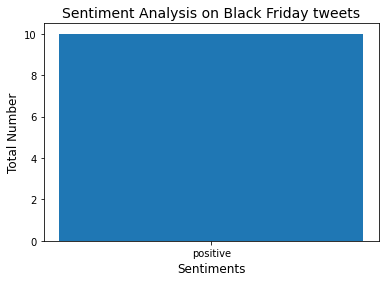

In [44]:
plt.bar(list(tweetdfdict.keys()), list(tweetdfdict.values()))

plt.xlabel('Sentiments', fontsize=12)
plt.ylabel('Total Number', fontsize=12)
plt.title('Sentiment Analysis on Black Friday tweets', fontsize=14)
plt.show()

### Wordcloud

In [82]:
def cleanTxt(text):

    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r':', '', text)
    text = re.sub(r'#', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?:\/\/\S+', '',text)
    return text

In [83]:
tweetdf['tweet_text'] = tweetdf['tweet_text'].apply(cleanTxt)

tweetdf

,tweet_text,retweet_count,followers_count,sentiments
2,If my inbox and spam folder are anything to go...,0,15420,positive
3,Early Black Friday Sale! 25% OFF \nPromo Code...,22,14105,positive
0,Kudos to for again demonstrating its climate ...,0,5375,positive
5,A clip was posted on the Facebook page “Mueang...,1,1825,positive
6,No Black Friday for loud . https//t.co/yPCLLdUKoT,6,1483,positive
7,The New Black Wall Street in Stonecrest opened...,538,914,positive
1,The TRINITY of TERROR triple headline tour fea...,177,689,positive
8,Sharing ValerieReese previous Charity Event wh...,0,542,positive
9,I bought the Definitive Edition on Black Frid...,0,34,positive
4,The White House decorations this year look lik...,1656,11,positive


In [84]:
pos_review = tweetdf[tweetdf['sentiments'] == 'positive']

In [93]:
text = " ".join(tweet for tweet in pos_review.tweet_text.astype(str))

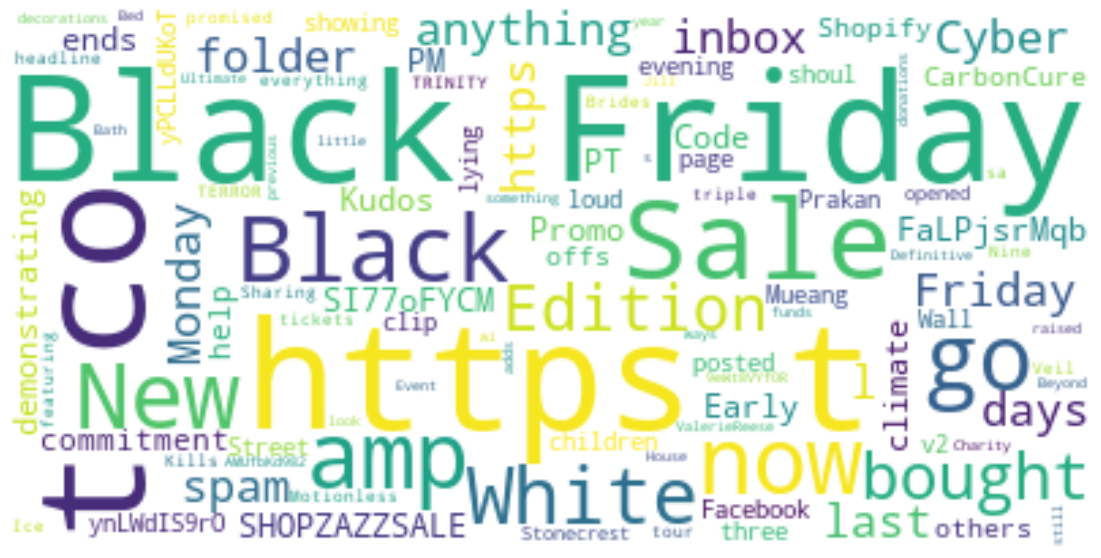

In [94]:
#Generating the word cloud image
stopwords = set(STOPWORDS)
wordcloud_pos = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

### Tabular word frequency

In [95]:
# stop = stopwords.words('english')
newStopWords = ['rt', '@', 'black', 'friday','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
               '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
stopwords.update(newStopWords)

In [96]:
pos_review["tweet_text_stop"] = pos_review["tweet_text"].str.replace("[^\w\s]", "").str.lower()

/var/folders/pc/qzxctc656pbdw4glm_hqv1f80000gn/T/ipykernel_41124/3680011079.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pos_review["tweet_text_stop"] = pos_review["tweet_text"].str.replace("[^\w\s]", "").str.lower()


In [97]:
pos_review["tweet_text_stop"] = pos_review["tweet_text_stop"].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
# a = pos_review["tweet_text_stop"].str.split(expand=True).stack().value_counts()

In [98]:
c = Counter(" ".join(pos_review["tweet_text_stop"].str.lower()).split()).most_common(100)

In [99]:
def pos_count_loder():
    c = Counter(" ".join(pos_review["tweet_text_stop"].str.lower()).split()).most_common(100)
    df = pd.DataFrame(c, columns = ['word', 'count'])
    return df
pos_count_loder()

,word,count
0,sale,3
1,go,2
2,now,2
3,amp,2
4,white,2
...,...,...
95,decorations,1
96,year,1
97,look,1
98,something,1
